# COVID-19 Johns Hopkins CSSE time series data
data source: https://github.com/CSSEGISandData/COVID-19
* https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Objectives:
1. อ่านข้อมูลที่อยู่ในรูป wide format แล้วแปลงเป็น long format
1. ทำการรวมข้อมูลจากหลาย ๆ ไฟล์เข้าด้วยกัน

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

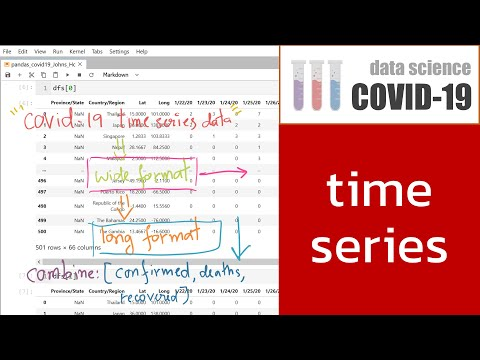

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('sBWgTkQ9Ezw', width=720, height=405)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'pandas   version: {pd.__version__}')
print(f'seaborn  version: {sns.__version__}')

pandas   version: 1.0.3
seaborn  version: 0.10.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-04-21 11:00:29.194494')

## read data from github

In [5]:
path='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
# path='https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
status=['Confirmed', 'Deaths', 'Recovered']
dfs=[] # list contains serveral dataframes
for s in status:
#     print(f'{path}{s.lower()}_global.csv')
    d=pd.read_csv(f'{path}{s.lower()}_global.csv')
    dfs.append(d)
dfs

[                Province/State         Country/Region        Lat       Long  \
 0                          NaN            Afghanistan  33.000000  65.000000   
 1                          NaN                Albania  41.153300  20.168300   
 2                          NaN                Algeria  28.033900   1.659600   
 3                          NaN                Andorra  42.506300   1.521800   
 4                          NaN                 Angola -11.202700  17.873900   
 ..                         ...                    ...        ...        ...   
 259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
 260                        NaN            South Sudan   6.877000  31.307000   
 261                        NaN         Western Sahara  24.215500 -12.885800   
 262                        NaN  Sao Tome and Principe   0.186360   6.613081   
 263                        NaN                  Yemen  15.552727  48.516388   
 
      1/22/20  1/23/20  1/24/20  1/25/

In [6]:
dfs[0]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [7]:
dfs[1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### append data

In [8]:
df=pd.concat(dfs, keys=status)
df

Province/State         Country/Region        Lat  \
Confirmed 0                          NaN            Afghanistan  33.000000   
          1                          NaN                Albania  41.153300   
          2                          NaN                Algeria  28.033900   
          3                          NaN                Andorra  42.506300   
          4                          NaN                 Angola -11.202700   
...                                  ...                    ...        ...   
Recovered 245  Saint Pierre and Miquelon                 France  46.885200   
          246                        NaN            South Sudan   6.877000   
          247                        NaN         Western Sahara  24.215500   
          248                        NaN  Sao Tome and Principe   0.186360   
          249                        NaN                  Yemen  15.552727   

                    Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Confirmed 0    65.000000        0        0        0        0        0   
          1    20.168300        0        0        0        0        0   
          2     1.659600        0        0        0        0        0   
          3     1.521800        0        0        0        0        0   
          4    17.873900        0        0        0        0        0   
...                  ...      ...      ...      ...      ...      ...   
Recovered 245 -56.315900        0        0        0        0        0   
          246  31.307000        0        0        0        0        0   
          247 -12.885800        0        0        0        0        0   
          248   6.613081        0        0        0        0        0   
          249  48.516388        0        0        0        0        0   

               1/27/20  ...  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
Confirmed 0          0  ...      555      607      665      714      784   
          1          0  ...      433      446      467      475      494   
          2          0  ...     1825     1914     1983     2070     2160   
          3          0  ...      601      638      646      659      673   
          4          0  ...       19       19       19       19       19   
...                ...  ...      ...      ...      ...      ...      ...   
Recovered 245        0  ...        0        0        0        0        0   
          246        0  ...        0        0        0        0        0   
          247        0  ...        0        0        0        0        0   
          248        0  ...        0        0        0        0        0   
          249        0  ...        0        0        0        0        0   

               4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  
Confirmed 0        840      906      933      996     1026  
          1        518      539      548      562      584  
          2       2268     2418     2534     2629     2718  
          3        673      696      704      713      717  
          4         19       19       24       24       24  
...                ...      ...      ...      ...      ...  
Recovered 245        0        0        0        0        0  
          246        0        0        0        0        0  
          247        0        0        0        0        0  
          248        0        0        0        0        0  
          249        0        0        0        0        0  

[778 rows x 94 columns]

In [9]:
df.loc['Deaths']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.loc['Recovered']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,32,32,32,40,43,54,99,112,131,135
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,197,217,232,248,251,277,283,302,314,327
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,460,591,601,691,708,783,846,894,1047,1099
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,71,128,128,128,169,169,191,205,235,248
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,4,5,5,5,5,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# df.drop(columns=['Lat', 'Long'], inplace=True)

### unpivot/melt data

In [12]:
df.loc['Confirmed']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [13]:
pd.melt(df.loc['Recovered'], 
            id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
            var_name='Date', value_name='Confirmed')

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
22495,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/20/20,0
22496,NaN,South Sudan,6.877000,31.307000,4/20/20,0
22497,NaN,Western Sahara,24.215500,-12.885800,4/20/20,0
22498,NaN,Sao Tome and Principe,0.186360,6.613081,4/20/20,0


In [14]:
dtmps=[]
for k in status:
    dtmps.append(pd.melt(df.loc[k], 
            id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
            var_name='Date', value_name=k))

In [15]:
dtmps

[                  Province/State         Country/Region        Lat       Long  \
 0                            NaN            Afghanistan  33.000000  65.000000   
 1                            NaN                Albania  41.153300  20.168300   
 2                            NaN                Algeria  28.033900   1.659600   
 3                            NaN                Andorra  42.506300   1.521800   
 4                            NaN                 Angola -11.202700  17.873900   
 ...                          ...                    ...        ...        ...   
 23755  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
 23756                        NaN            South Sudan   6.877000  31.307000   
 23757                        NaN         Western Sahara  24.215500 -12.885800   
 23758                        NaN  Sao Tome and Principe   0.186360   6.613081   
 23759                        NaN                  Yemen  15.552727  48.516388   
 
           Dat

In [16]:
dtmps[0]

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
23755,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/20/20,1
23756,NaN,South Sudan,6.877000,31.307000,4/20/20,4
23757,NaN,Western Sahara,24.215500,-12.885800,4/20/20,6
23758,NaN,Sao Tome and Principe,0.186360,6.613081,4/20/20,4


In [17]:
dtmps[1]

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
23755,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/20/20,0
23756,NaN,South Sudan,6.877000,31.307000,4/20/20,0
23757,NaN,Western Sahara,24.215500,-12.885800,4/20/20,0
23758,NaN,Sao Tome and Principe,0.186360,6.613081,4/20/20,0


In [18]:
dx=[d.set_index(['Province/State', 'Country/Region', 'Date']) for d in dtmps]
dcovid=pd.concat(dx, axis=1)
dcovid.reset_index(inplace=True)

In [19]:
dcovid

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Lat,Long,Deaths,Lat,Long,Recovered
0,NaN,Afghanistan,1/22/20,33.0000,65.0000,0.0,33.0000,65.0000,0.0,33.0000,65.0000,0
1,NaN,Albania,1/22/20,41.1533,20.1683,0.0,41.1533,20.1683,0.0,41.1533,20.1683,0
2,NaN,Algeria,1/22/20,28.0339,1.6596,0.0,28.0339,1.6596,0.0,28.0339,1.6596,0
3,NaN,Andorra,1/22/20,42.5063,1.5218,0.0,42.5063,1.5218,0.0,42.5063,1.5218,0
4,NaN,Angola,1/22/20,-11.2027,17.8739,0.0,-11.2027,17.8739,0.0,-11.2027,17.8739,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23845,NaN,Canada,4/16/20,NaN,NaN,NaN,NaN,NaN,NaN,56.1304,-106.3468,9698
23846,NaN,Canada,4/17/20,NaN,NaN,NaN,NaN,NaN,NaN,56.1304,-106.3468,10545
23847,NaN,Canada,4/18/20,NaN,NaN,NaN,NaN,NaN,NaN,56.1304,-106.3468,10964
23848,NaN,Canada,4/19/20,NaN,NaN,NaN,NaN,NaN,NaN,56.1304,-106.3468,11847


### remove duplicated columns

In [20]:
dcovid.columns

Index(['Province/State', 'Country/Region', 'Date', 'Lat', 'Long', 'Confirmed',
       'Lat', 'Long', 'Deaths', 'Lat', 'Long', 'Recovered'],
      dtype='object')

In [22]:
# dcovid.iloc[:, [0, 1, 2, 3, 7, 11]]

In [23]:
# dcovid=pd.concat([dtmps[0], dtmps[1][['Recovered']], dtmps[2][['Deaths']]], axis=1)
# dcovid

In [24]:
dcovid.columns

Index(['Province/State', 'Country/Region', 'Date', 'Lat', 'Long', 'Confirmed',
       'Lat', 'Long', 'Deaths', 'Lat', 'Long', 'Recovered'],
      dtype='object')

In [25]:
dcovid.columns.duplicated()

array([False, False, False, False, False, False,  True,  True, False,
        True,  True, False])

In [26]:
dcovid=dcovid.loc[:, ~dcovid.columns.duplicated()]
dcovid

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,1/22/20,33.0000,65.0000,0.0,0.0,0
1,NaN,Albania,1/22/20,41.1533,20.1683,0.0,0.0,0
2,NaN,Algeria,1/22/20,28.0339,1.6596,0.0,0.0,0
3,NaN,Andorra,1/22/20,42.5063,1.5218,0.0,0.0,0
4,NaN,Angola,1/22/20,-11.2027,17.8739,0.0,0.0,0
...,...,...,...,...,...,...,...,...
19720,NaN,Canada,4/1/20,NaN,NaN,NaN,NaN,1324
19721,NaN,Canada,4/2/20,NaN,NaN,NaN,NaN,1735
19722,NaN,Canada,4/3/20,NaN,NaN,NaN,NaN,2175
19723,NaN,Canada,4/4/20,NaN,NaN,NaN,NaN,2577


In [27]:
dcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19725 entries, 0 to 19724
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6150 non-null   object 
 1   Country/Region  19725 non-null  object 
 2   Date            19725 non-null  object 
 3   Lat             19650 non-null  float64
 4   Long            19650 non-null  float64
 5   Confirmed       19650 non-null  float64
 6   Deaths          19650 non-null  float64
 7   Recovered       19725 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


### convert date data type

In [28]:
dcovid['Date']=pd.to_datetime(dcovid['Date'])
# dcovid.loc[:, 'Date']=pd.to_datetime(dcovid['Date'])

In [29]:
dcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19725 entries, 0 to 19724
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6150 non-null   object        
 1   Country/Region  19725 non-null  object        
 2   Date            19725 non-null  datetime64[ns]
 3   Lat             19650 non-null  float64       
 4   Long            19650 non-null  float64       
 5   Confirmed       19650 non-null  float64       
 6   Deaths          19650 non-null  float64       
 7   Recovered       19725 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [30]:
dcovid.head()

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,2020-01-22,33.0000,65.0000,0.0,0.0,0
1,NaN,Albania,2020-01-22,41.1533,20.1683,0.0,0.0,0
2,NaN,Algeria,2020-01-22,28.0339,1.6596,0.0,0.0,0
3,NaN,Andorra,2020-01-22,42.5063,1.5218,0.0,0.0,0
4,NaN,Angola,2020-01-22,-11.2027,17.8739,0.0,0.0,0


In [31]:
dcovid=dcovid.sort_values(['Country/Region', 'Province/State', 'Date']).reset_index(drop=True)
dcovid

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,2020-01-22,33.0,65.0,0.0,0.0,0
1,NaN,Afghanistan,2020-01-23,33.0,65.0,0.0,0.0,0
2,NaN,Afghanistan,2020-01-24,33.0,65.0,0.0,0.0,0
3,NaN,Afghanistan,2020-01-25,33.0,65.0,0.0,0.0,0
4,NaN,Afghanistan,2020-01-26,33.0,65.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
19720,NaN,Zimbabwe,2020-04-01,-20.0,30.0,8.0,1.0,0
19721,NaN,Zimbabwe,2020-04-02,-20.0,30.0,9.0,1.0,0
19722,NaN,Zimbabwe,2020-04-03,-20.0,30.0,9.0,1.0,0
19723,NaN,Zimbabwe,2020-04-04,-20.0,30.0,9.0,1.0,0


In [32]:
pd.set_option('display.max_rows', 100)

In [33]:
dcovid[dcovid['Country/Region']=='Thailand']

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered
17550,NaN,Thailand,2020-01-22,15.0,101.0,2.0,0.0,0
17551,NaN,Thailand,2020-01-23,15.0,101.0,3.0,0.0,0
17552,NaN,Thailand,2020-01-24,15.0,101.0,5.0,0.0,0
17553,NaN,Thailand,2020-01-25,15.0,101.0,7.0,0.0,0
17554,NaN,Thailand,2020-01-26,15.0,101.0,8.0,0.0,2
17555,NaN,Thailand,2020-01-27,15.0,101.0,8.0,0.0,2
17556,NaN,Thailand,2020-01-28,15.0,101.0,14.0,0.0,5
17557,NaN,Thailand,2020-01-29,15.0,101.0,14.0,0.0,5
17558,NaN,Thailand,2020-01-30,15.0,101.0,14.0,0.0,5
17559,NaN,Thailand,2020-01-31,15.0,101.0,19.0,0.0,5


## aggregate by Country/Region

In [34]:
dcovid[dcovid['Country/Region']=='China']

,Province/State,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered
4350,Anhui,China,2020-01-22,31.8257,117.2264,1.0,0.0,0
4351,Anhui,China,2020-01-23,31.8257,117.2264,9.0,0.0,0
4352,Anhui,China,2020-01-24,31.8257,117.2264,15.0,0.0,0
4353,Anhui,China,2020-01-25,31.8257,117.2264,39.0,0.0,0
4354,Anhui,China,2020-01-26,31.8257,117.2264,60.0,0.0,0
...,...,...,...,...,...,...,...,...
6820,Zhejiang,China,2020-04-01,29.1832,120.0934,1257.0,1.0,1226
6821,Zhejiang,China,2020-04-02,29.1832,120.0934,1258.0,1.0,1228
6822,Zhejiang,China,2020-04-03,29.1832,120.0934,1260.0,1.0,1228
6823,Zhejiang,China,2020-04-04,29.1832,120.0934,1262.0,1.0,1229


In [35]:
dcountry=dcovid.groupby(['Country/Region', 'Date']).sum()[['Confirmed', 'Deaths', 'Recovered']]
dcountry

Confirmed  Deaths  Recovered
Country/Region Date                                    
Afghanistan    2020-01-22        0.0     0.0          0
               2020-01-23        0.0     0.0          0
               2020-01-24        0.0     0.0          0
               2020-01-25        0.0     0.0          0
               2020-01-26        0.0     0.0          0
...                              ...     ...        ...
Zimbabwe       2020-04-01        8.0     1.0          0
               2020-04-02        9.0     1.0          0
               2020-04-03        9.0     1.0          0
               2020-04-04        9.0     1.0          0
               2020-04-05        9.0     1.0          0

[13725 rows x 3 columns]

In [36]:
dcountry.index

MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26'),
            ('Afghanistan', '2020-01-27'),
            ('Afghanistan', '2020-01-28'),
            ('Afghanistan', '2020-01-29'),
            ('Afghanistan', '2020-01-30'),
            ('Afghanistan', '2020-01-31'),
            ...
            (   'Zimbabwe', '2020-03-27'),
            (   'Zimbabwe', '2020-03-28'),
            (   'Zimbabwe', '2020-03-29'),
            (   'Zimbabwe', '2020-03-30'),
            (   'Zimbabwe', '2020-03-31'),
            (   'Zimbabwe', '2020-04-01'),
            (   'Zimbabwe', '2020-04-02'),
            (   'Zimbabwe', '2020-04-03'),
            (   'Zimbabwe', '2020-04-04'),
            (   'Zimbabwe', '2020-04-05')],
           names=['Country/Region', 'Date'], length=13725)

In [37]:
dcountry.loc['Thailand']

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,2.0,0.0,0
2020-01-23,3.0,0.0,0
2020-01-24,5.0,0.0,0
2020-01-25,7.0,0.0,0
2020-01-26,8.0,0.0,2
2020-01-27,8.0,0.0,2
2020-01-28,14.0,0.0,5
2020-01-29,14.0,0.0,5
2020-01-30,14.0,0.0,5


In [38]:
dcountry.loc[('Thailand', '2020-03-22')]

Confirmed    599.0
Deaths         1.0
Recovered     44.0
Name: (Thailand, 2020-03-22 00:00:00), dtype: float64

In [39]:
dcountry.reset_index(inplace=True)
dcountry

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0.0,0.0,0
1,Afghanistan,2020-01-23,0.0,0.0,0
2,Afghanistan,2020-01-24,0.0,0.0,0
3,Afghanistan,2020-01-25,0.0,0.0,0
4,Afghanistan,2020-01-26,0.0,0.0,0
...,...,...,...,...,...
13720,Zimbabwe,2020-04-01,8.0,1.0,0
13721,Zimbabwe,2020-04-02,9.0,1.0,0
13722,Zimbabwe,2020-04-03,9.0,1.0,0
13723,Zimbabwe,2020-04-04,9.0,1.0,0


In [40]:
dcountry[dcountry['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered
12300,Thailand,2020-01-22,2.0,0.0,0
12301,Thailand,2020-01-23,3.0,0.0,0
12302,Thailand,2020-01-24,5.0,0.0,0
12303,Thailand,2020-01-25,7.0,0.0,0
12304,Thailand,2020-01-26,8.0,0.0,2
12305,Thailand,2020-01-27,8.0,0.0,2
12306,Thailand,2020-01-28,14.0,0.0,5
12307,Thailand,2020-01-29,14.0,0.0,5
12308,Thailand,2020-01-30,14.0,0.0,5
12309,Thailand,2020-01-31,19.0,0.0,5


In [41]:
dcountry['daily_new_patient']=dcountry.groupby(['Country/Region'])['Confirmed'].diff()
dcountry['daily_new_patient_pct']=dcountry.groupby(['Country/Region'])['Confirmed'].pct_change()

In [42]:
dcountry[dcountry['Country/Region']=='Italy']

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
6300,Italy,2020-01-22,0.0,0.0,0,NaN,NaN
6301,Italy,2020-01-23,0.0,0.0,0,0.0,NaN
6302,Italy,2020-01-24,0.0,0.0,0,0.0,NaN
6303,Italy,2020-01-25,0.0,0.0,0,0.0,NaN
6304,Italy,2020-01-26,0.0,0.0,0,0.0,NaN
6305,Italy,2020-01-27,0.0,0.0,0,0.0,NaN
6306,Italy,2020-01-28,0.0,0.0,0,0.0,NaN
6307,Italy,2020-01-29,0.0,0.0,0,0.0,NaN
6308,Italy,2020-01-30,0.0,0.0,0,0.0,NaN
6309,Italy,2020-01-31,2.0,0.0,0,2.0,inf


In [43]:
dcountry

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
13720,Zimbabwe,2020-04-01,8.0,1.0,0,0.0,0.000
13721,Zimbabwe,2020-04-02,9.0,1.0,0,1.0,0.125
13722,Zimbabwe,2020-04-03,9.0,1.0,0,0.0,0.000
13723,Zimbabwe,2020-04-04,9.0,1.0,0,0.0,0.000


In [44]:
pd.set_option('display.max_rows', 100)

In [45]:
dcountry[dcountry['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
12300,Thailand,2020-01-22,2.0,0.0,0,NaN,NaN
12301,Thailand,2020-01-23,3.0,0.0,0,1.0,0.500000
12302,Thailand,2020-01-24,5.0,0.0,0,2.0,0.666667
12303,Thailand,2020-01-25,7.0,0.0,0,2.0,0.400000
12304,Thailand,2020-01-26,8.0,0.0,2,1.0,0.142857
12305,Thailand,2020-01-27,8.0,0.0,2,0.0,0.000000
12306,Thailand,2020-01-28,14.0,0.0,5,6.0,0.750000
12307,Thailand,2020-01-29,14.0,0.0,5,0.0,0.000000
12308,Thailand,2020-01-30,14.0,0.0,5,0.0,0.000000
12309,Thailand,2020-01-31,19.0,0.0,5,5.0,0.357143


In [46]:
dcountry

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Afghanistan,2020-01-22,0.0,0.0,0,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0,0.0,NaN
2,Afghanistan,2020-01-24,0.0,0.0,0,0.0,NaN
3,Afghanistan,2020-01-25,0.0,0.0,0,0.0,NaN
4,Afghanistan,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
13720,Zimbabwe,2020-04-01,8.0,1.0,0,0.0,0.000
13721,Zimbabwe,2020-04-02,9.0,1.0,0,1.0,0.125
13722,Zimbabwe,2020-04-03,9.0,1.0,0,0.0,0.000
13723,Zimbabwe,2020-04-04,9.0,1.0,0,0.0,0.000


In [47]:
dcountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Country/Region         13725 non-null  object        
 1   Date                   13725 non-null  datetime64[ns]
 2   Confirmed              13725 non-null  float64       
 3   Deaths                 13725 non-null  float64       
 4   Recovered              13725 non-null  int64         
 5   daily_new_patient      13542 non-null  float64       
 6   daily_new_patient_pct  6126 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 750.7+ KB


In [48]:
dcountry[dcountry['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
12300,Thailand,2020-01-22,2.0,0.0,0,NaN,NaN
12301,Thailand,2020-01-23,3.0,0.0,0,1.0,0.500000
12302,Thailand,2020-01-24,5.0,0.0,0,2.0,0.666667
12303,Thailand,2020-01-25,7.0,0.0,0,2.0,0.400000
12304,Thailand,2020-01-26,8.0,0.0,2,1.0,0.142857
12305,Thailand,2020-01-27,8.0,0.0,2,0.0,0.000000
12306,Thailand,2020-01-28,14.0,0.0,5,6.0,0.750000
12307,Thailand,2020-01-29,14.0,0.0,5,0.0,0.000000
12308,Thailand,2020-01-30,14.0,0.0,5,0.0,0.000000
12309,Thailand,2020-01-31,19.0,0.0,5,5.0,0.357143


## Interactive chart

### all countries

In [49]:
pd.Series(dcountry['Country/Region'].unique()).sort_values()

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
178               Vietnam
179    West Bank and Gaza
180        Western Sahara
181                Zambia
182              Zimbabwe
Length: 183, dtype: object

In [61]:
@interact(country=pd.Series(dcountry['Country/Region'].unique()).sort_values())
def plot_chart(country):
    df=dcountry[dcountry['Country/Region'].str.contains(country)]
    df[['Date', 'Confirmed', ]].set_index('Date').plot(figsize=(16, 7))

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

### countries with confirmed cases > n

In [51]:
dq=dcountry[['Country/Region', 'Confirmed']].groupby('Country/Region').max() > 300
dq.index[dq.Confirmed]

@interact(country=pd.Series(dq.index[dq.Confirmed]))
def plot_chart(country):
    df=dcountry[dcountry['Country/Region'].str.contains(country)]
    df[['Date', 'Confirmed', 'Recovered', 'Deaths']].set_index('Date').plot(figsize=(16, 7), 
                                                                            color=['purple', 'green', 'red'], 
                                                                            drawstyle='steps')
    plt.xlabel('')
    plt.ylabel('persons')
    plt.title(f'COVID-19 in {country}')

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

### daily new confirmed cases

In [52]:
dcountry[dcountry['Country/Region']=='Thailand']

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
12300,Thailand,2020-01-22,2.0,0.0,0,NaN,NaN
12301,Thailand,2020-01-23,3.0,0.0,0,1.0,0.500000
12302,Thailand,2020-01-24,5.0,0.0,0,2.0,0.666667
12303,Thailand,2020-01-25,7.0,0.0,0,2.0,0.400000
12304,Thailand,2020-01-26,8.0,0.0,2,1.0,0.142857
12305,Thailand,2020-01-27,8.0,0.0,2,0.0,0.000000
12306,Thailand,2020-01-28,14.0,0.0,5,6.0,0.750000
12307,Thailand,2020-01-29,14.0,0.0,5,0.0,0.000000
12308,Thailand,2020-01-30,14.0,0.0,5,0.0,0.000000
12309,Thailand,2020-01-31,19.0,0.0,5,5.0,0.357143


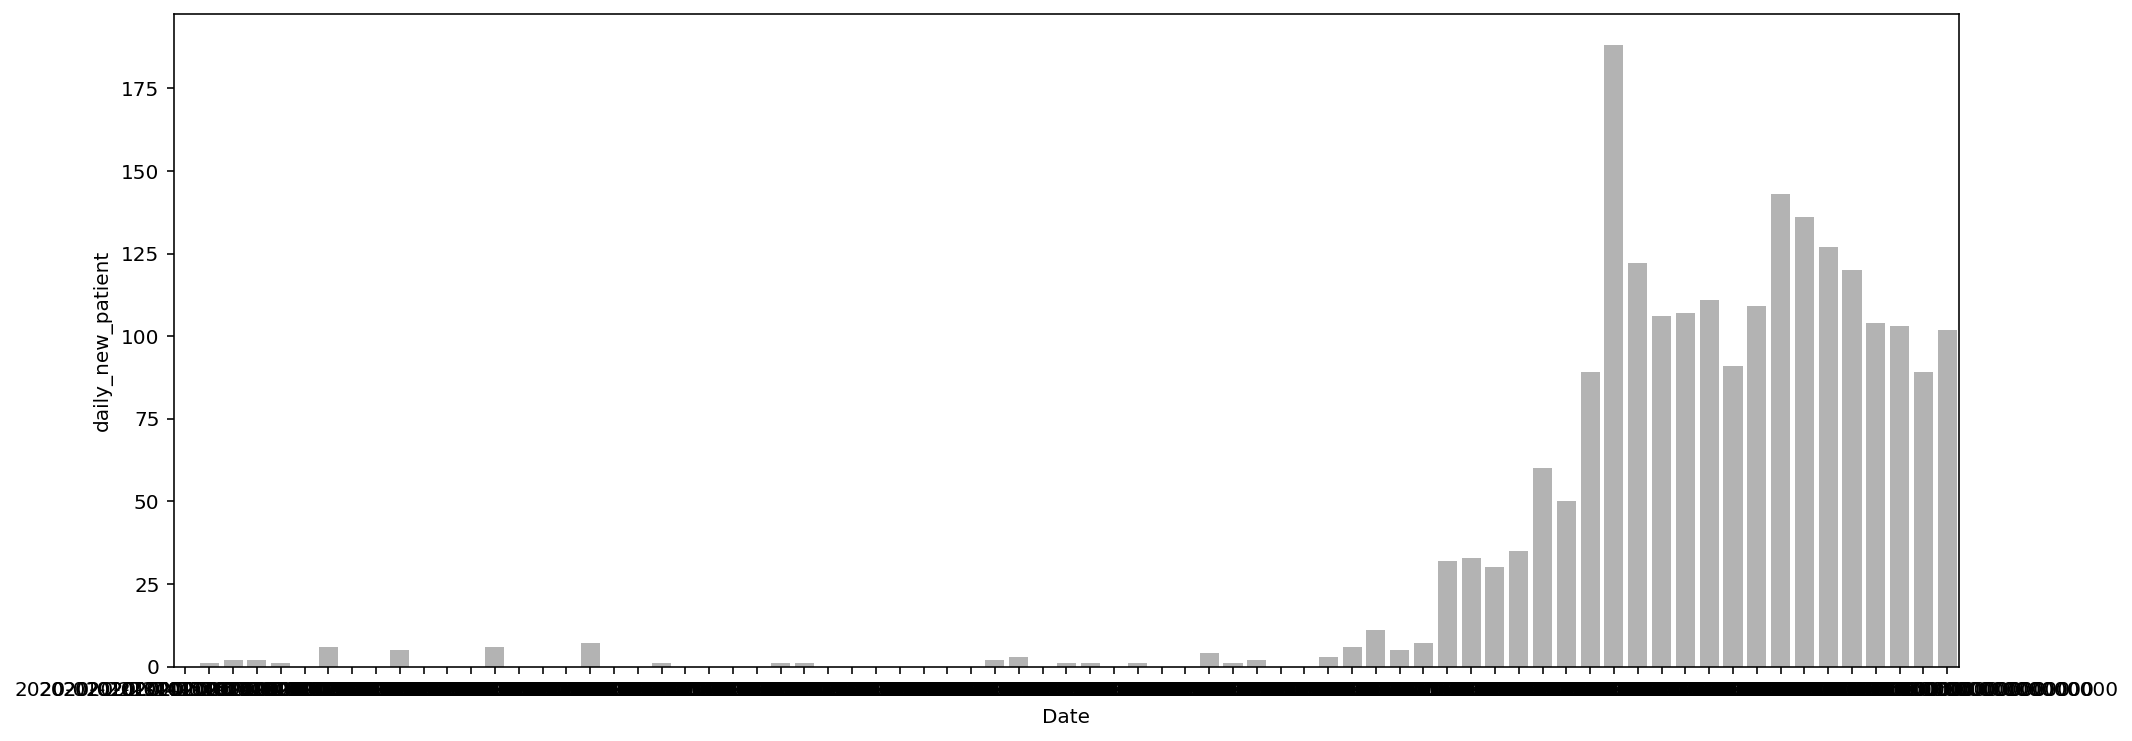

In [53]:
plt.figure(figsize=(16,6))
sns.barplot(data=dcountry[dcountry['Country/Region']=='Thailand'],
           x='Date', y='daily_new_patient', color='.7')

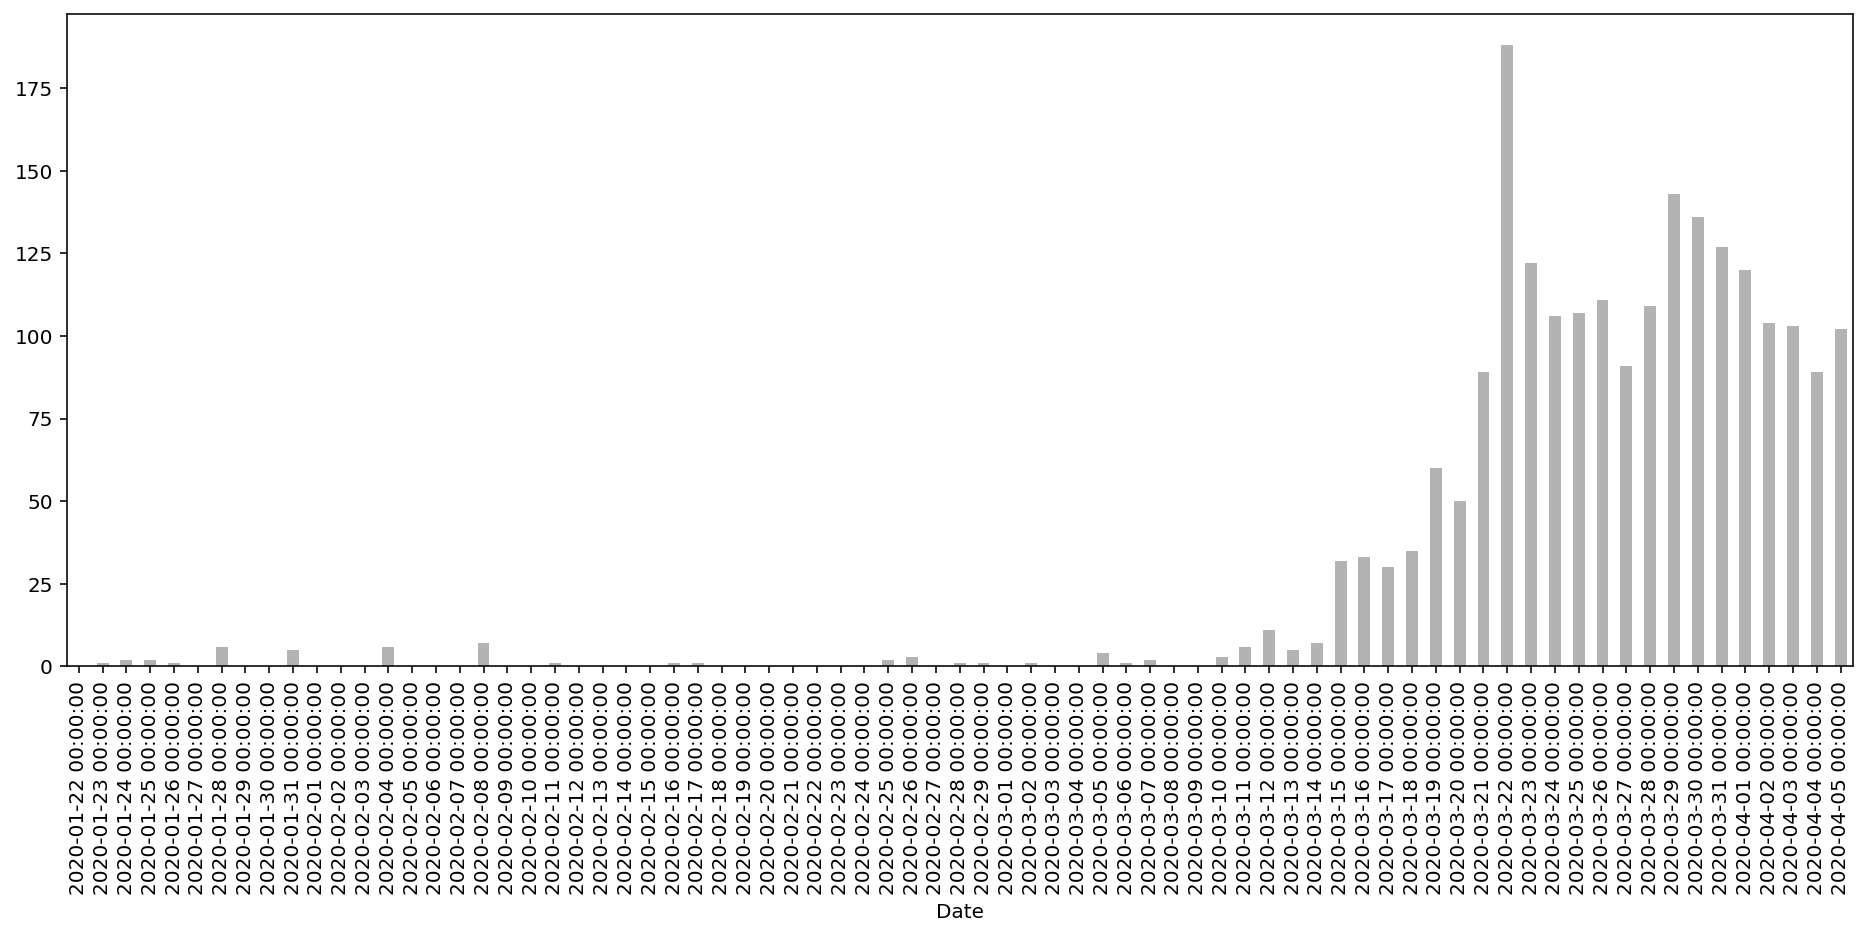

In [54]:
plt.figure(figsize=(16, 6))
dc=dcountry[dcountry['Country/Region']=='Thailand'].set_index('Date')
dc['daily_new_patient'].plot(kind='bar', color='.7')

## log scale
* why using log-scale: https://www.nytimes.com/2020/03/20/health/coronavirus-data-logarithm-chart.html

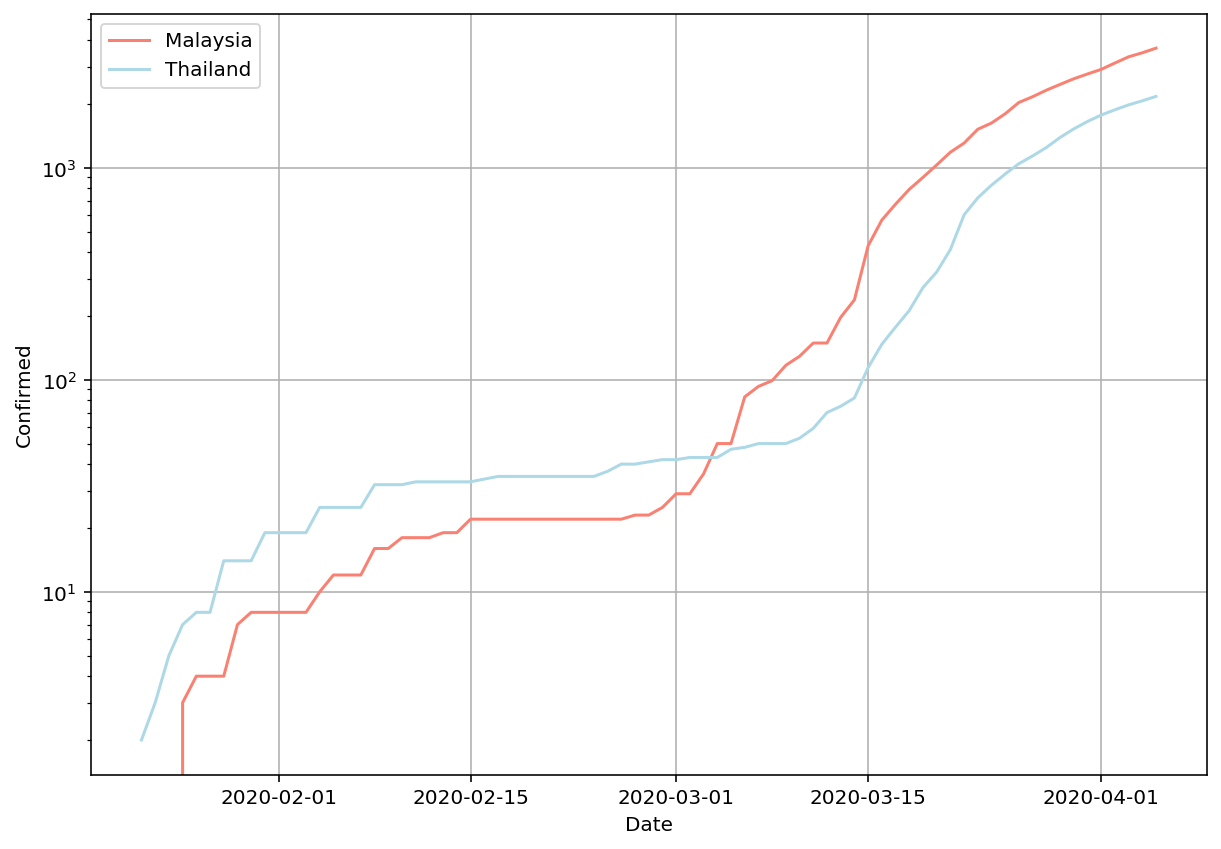

In [55]:
# country1='Thailand'
country1='Malaysia'
country2='Thailand'
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_yscale('log', basey=10)
dc1=dcountry[dcountry['Country/Region']==country1]
dc2=dcountry[dcountry['Country/Region']==country2]
sns.lineplot(x=dc1.Date, y=dc1['Confirmed'], ax=ax, color='salmon', label=country1)
sns.lineplot(x=dc2.Date, y=dc2['Confirmed'], ax=ax, color='lightblue', label=country2)
ax.grid()
# ax2=ax.twinx()
# ax2.set_yscale('log', basey=10)
# sns.lineplot(x=dc.Date, y=dc['Confirmed'], ax=ax2, color='black', label='log')
# plt.title('COVID-19 in Thailand')
# plt.grid()
# fig.legend()

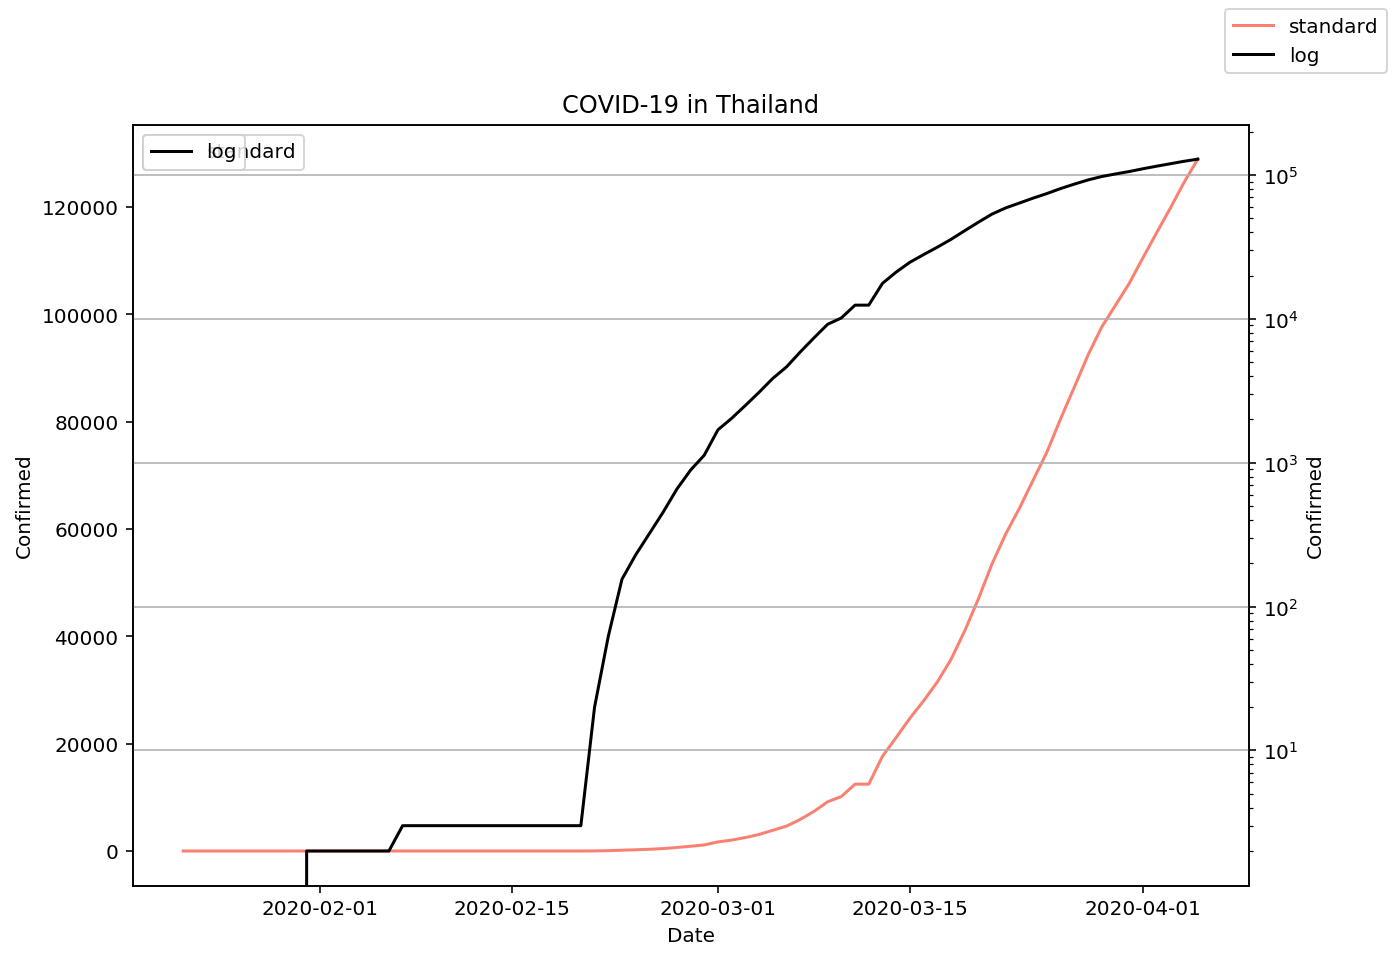

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
# dc=dcountry[dcountry['Country/Region']=='Thailand']
dc=dcountry[dcountry['Country/Region']=='Italy']

sns.lineplot(x=dc.Date, y=dc['Confirmed'], ax=ax, color='salmon', label='standard')
ax2=ax.twinx()
ax2.set_yscale('log', basey=10)
sns.lineplot(x=dc.Date, y=dc['Confirmed'], ax=ax2, color='black', label='log')
plt.title('COVID-19 in Thailand')
plt.grid()
fig.legend()

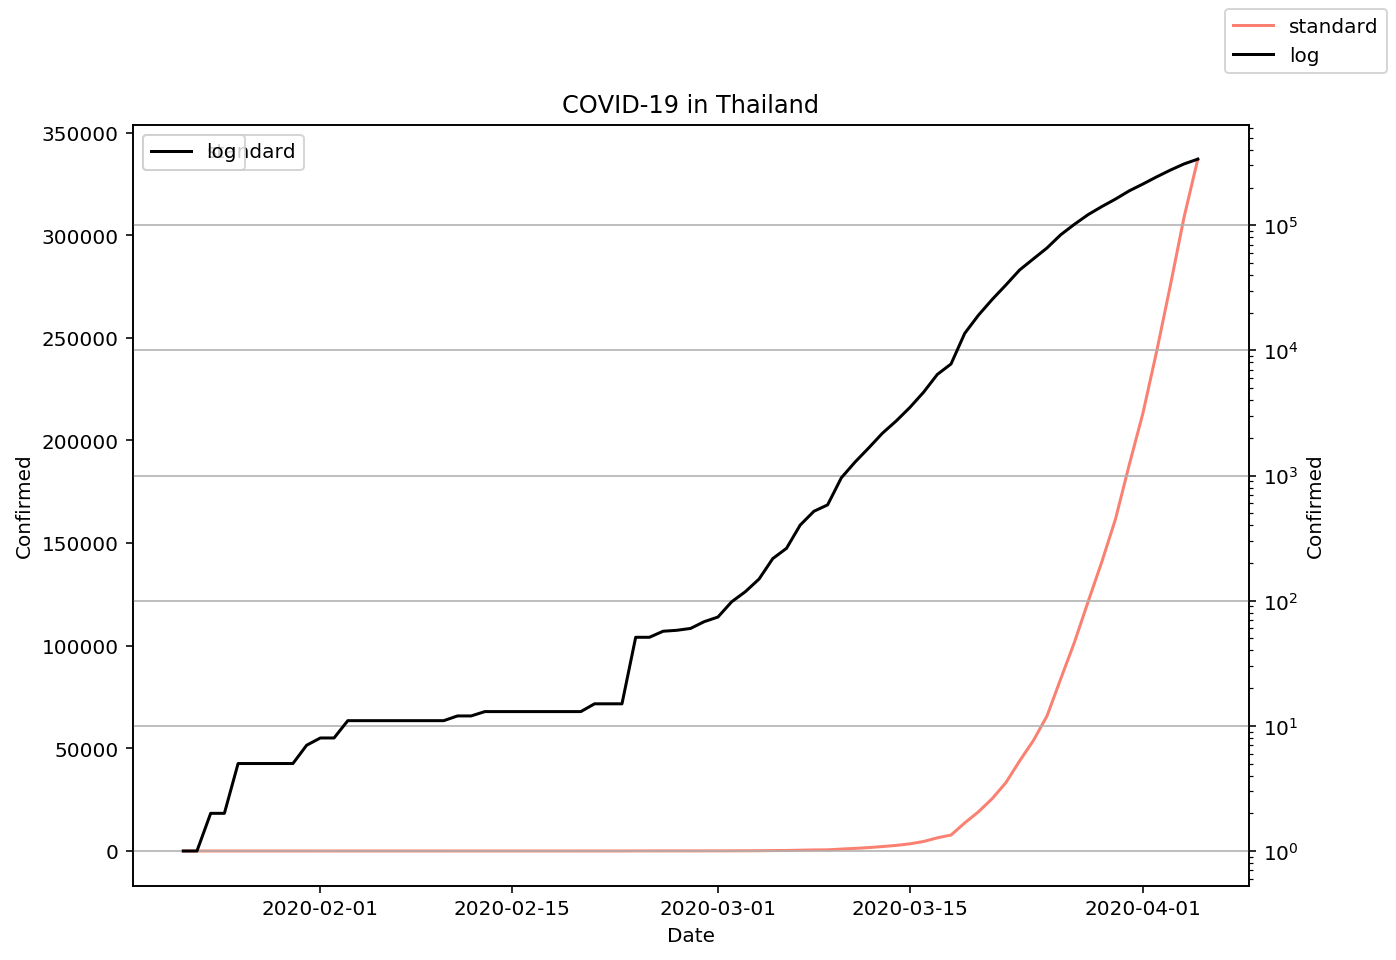

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
dc=dcountry[dcountry['Country/Region'].str.contains('US')]
sns.lineplot(x=dc.Date, y=dc['Confirmed'], ax=ax, color='salmon', label='standard')
ax2=ax.twinx()
ax2.set_yscale('log', basey=10)
sns.lineplot(x=dc.Date, y=dc['Confirmed'], ax=ax2, color='black', label='log')
plt.title('COVID-19 in Thailand')
plt.grid()
fig.legend()

In [58]:
dq=dcountry[['Country/Region', 'Confirmed']].groupby('Country/Region').max() > 10000
dq.index[dq.Confirmed]
dg=dcountry[dcountry['Country/Region'].isin(dq.index[dq.Confirmed])].reset_index(drop=True)
dg

,Country/Region,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,Austria,2020-01-22,0.0,0.0,0,NaN,NaN
1,Austria,2020-01-23,0.0,0.0,0,0.0,NaN
2,Austria,2020-01-24,0.0,0.0,0,0.0,NaN
3,Austria,2020-01-25,0.0,0.0,0,0.0,NaN
4,Austria,2020-01-26,0.0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...
1270,United Kingdom,2020-04-01,29865.0,2357.0,179,4384.0,0.172050
1271,United Kingdom,2020-04-02,34173.0,2926.0,192,4308.0,0.144249
1272,United Kingdom,2020-04-03,38689.0,3611.0,208,4516.0,0.132151
1273,United Kingdom,2020-04-04,42477.0,4320.0,215,3788.0,0.097909


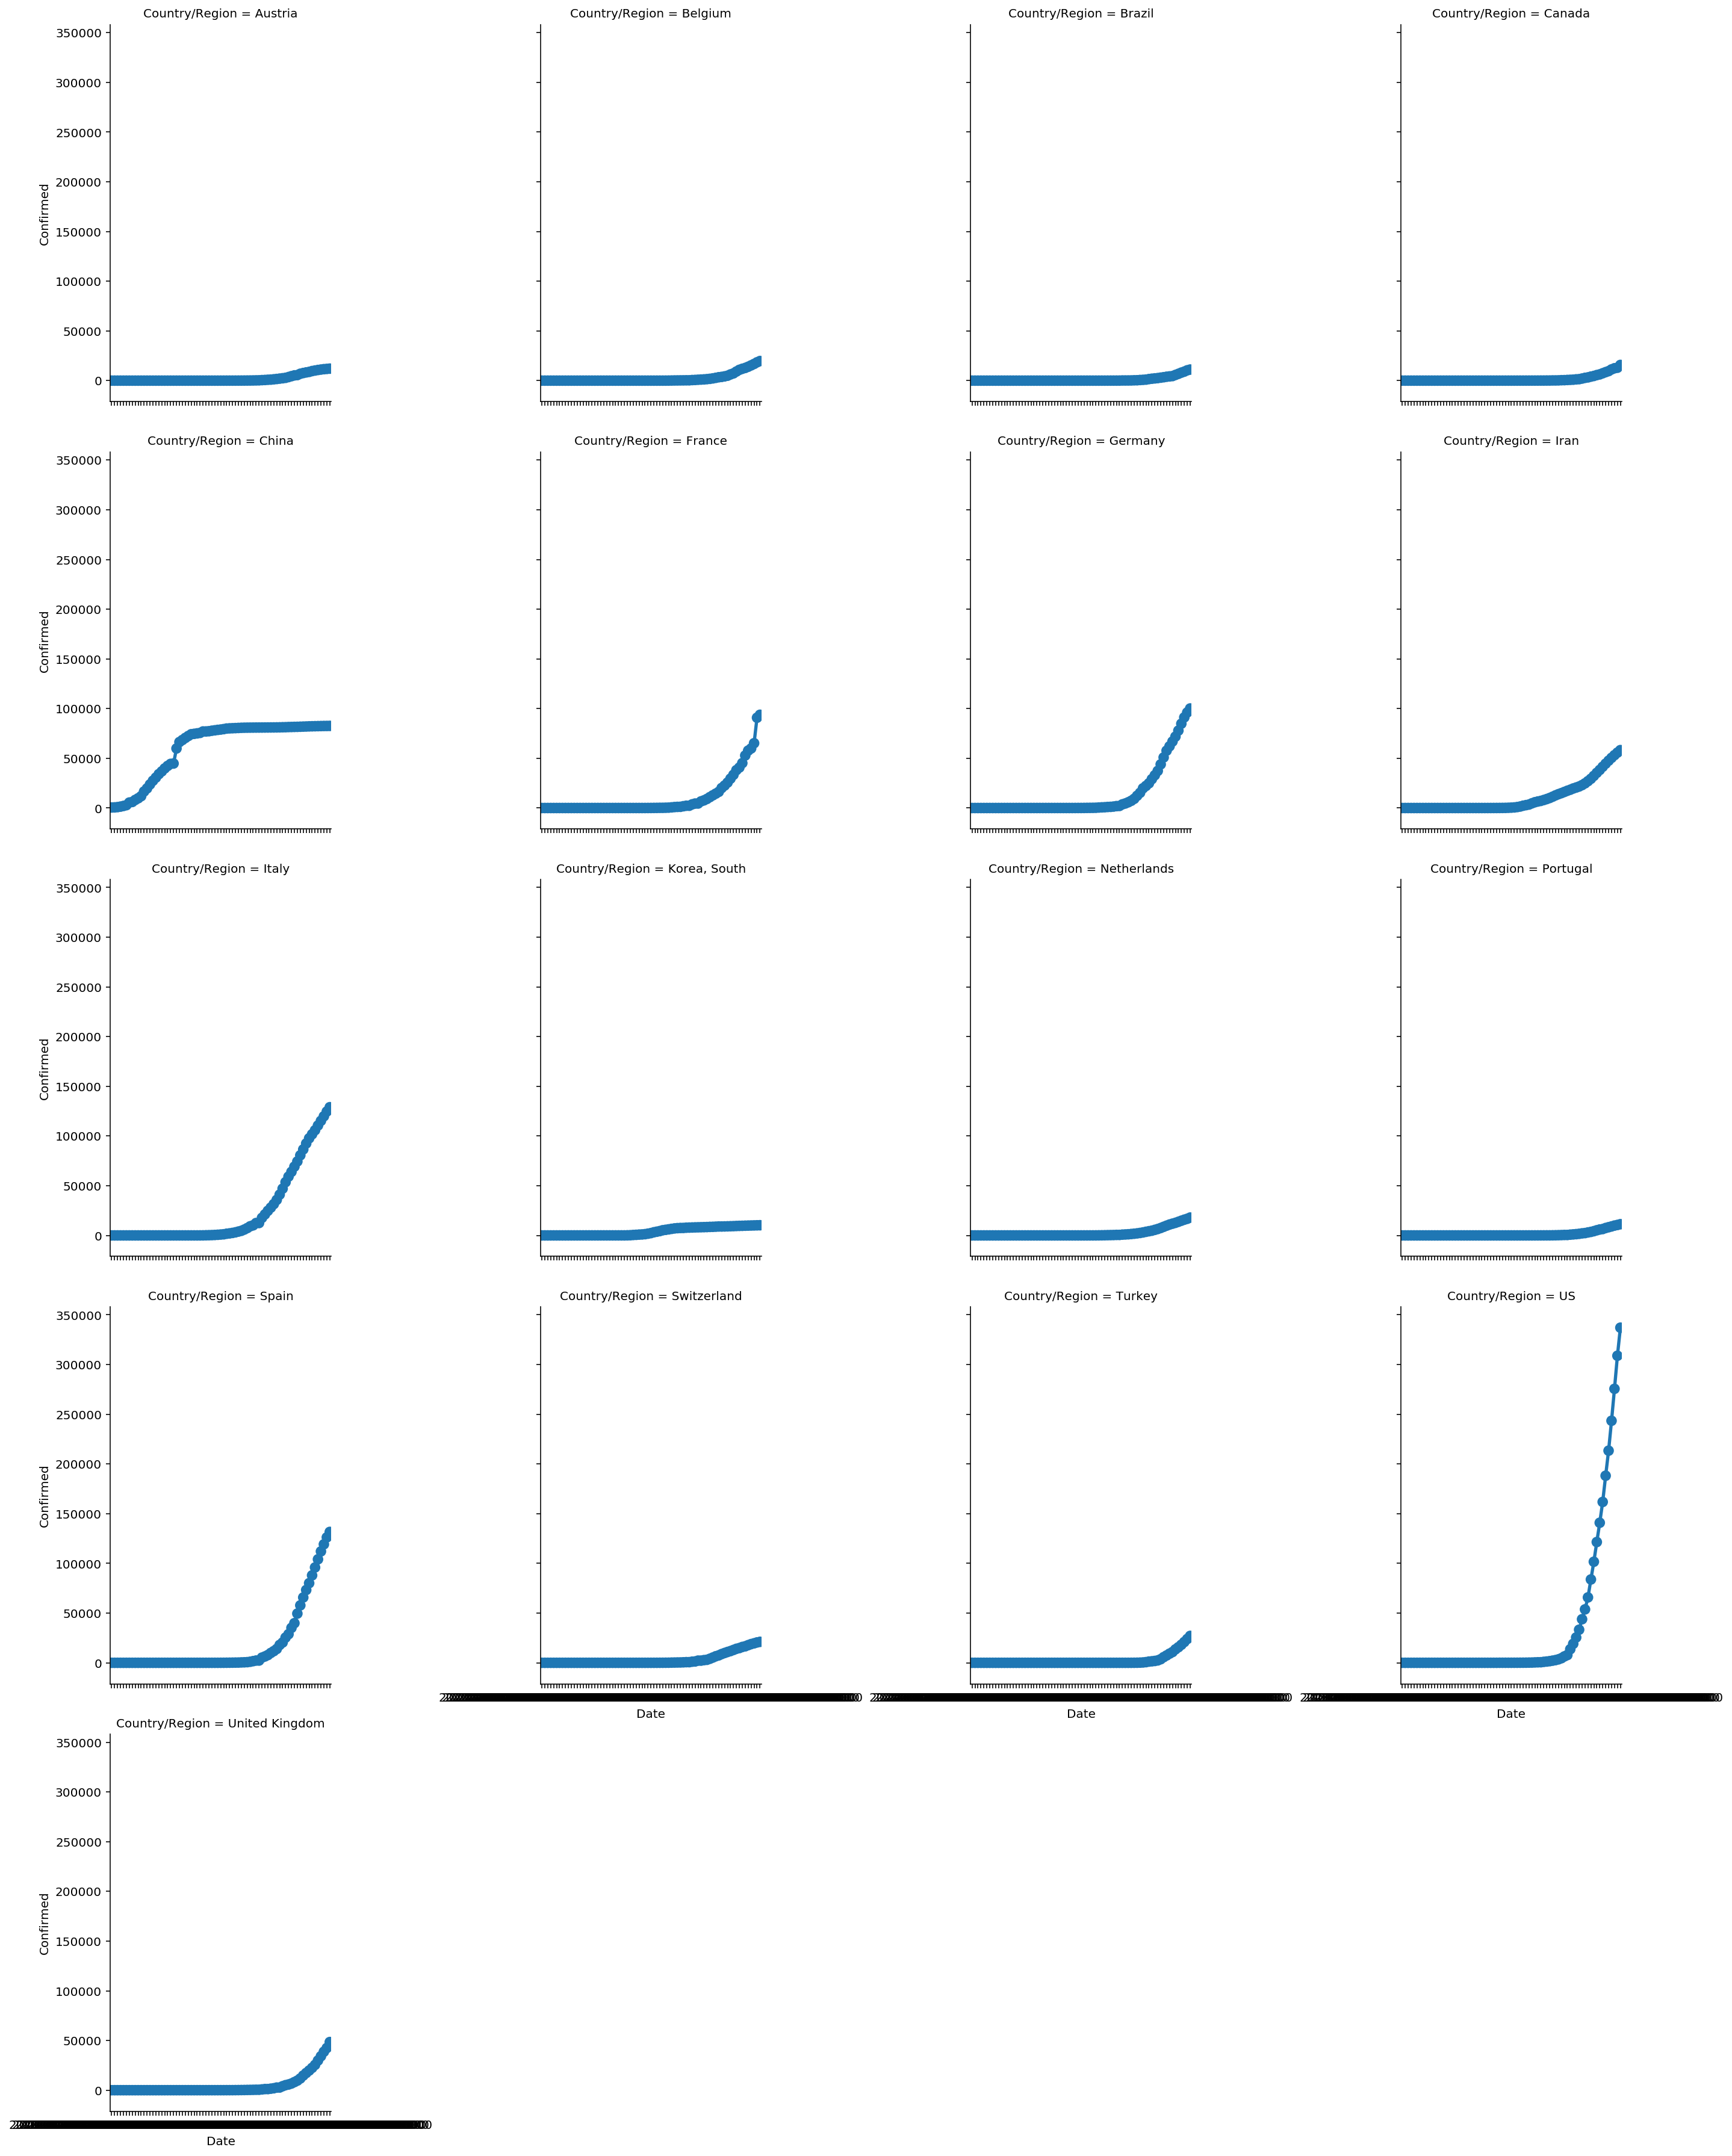

In [59]:
sns.catplot(data=dg, x='Date', y='Confirmed', kind='point', col='Country/Region', col_wrap=4, )

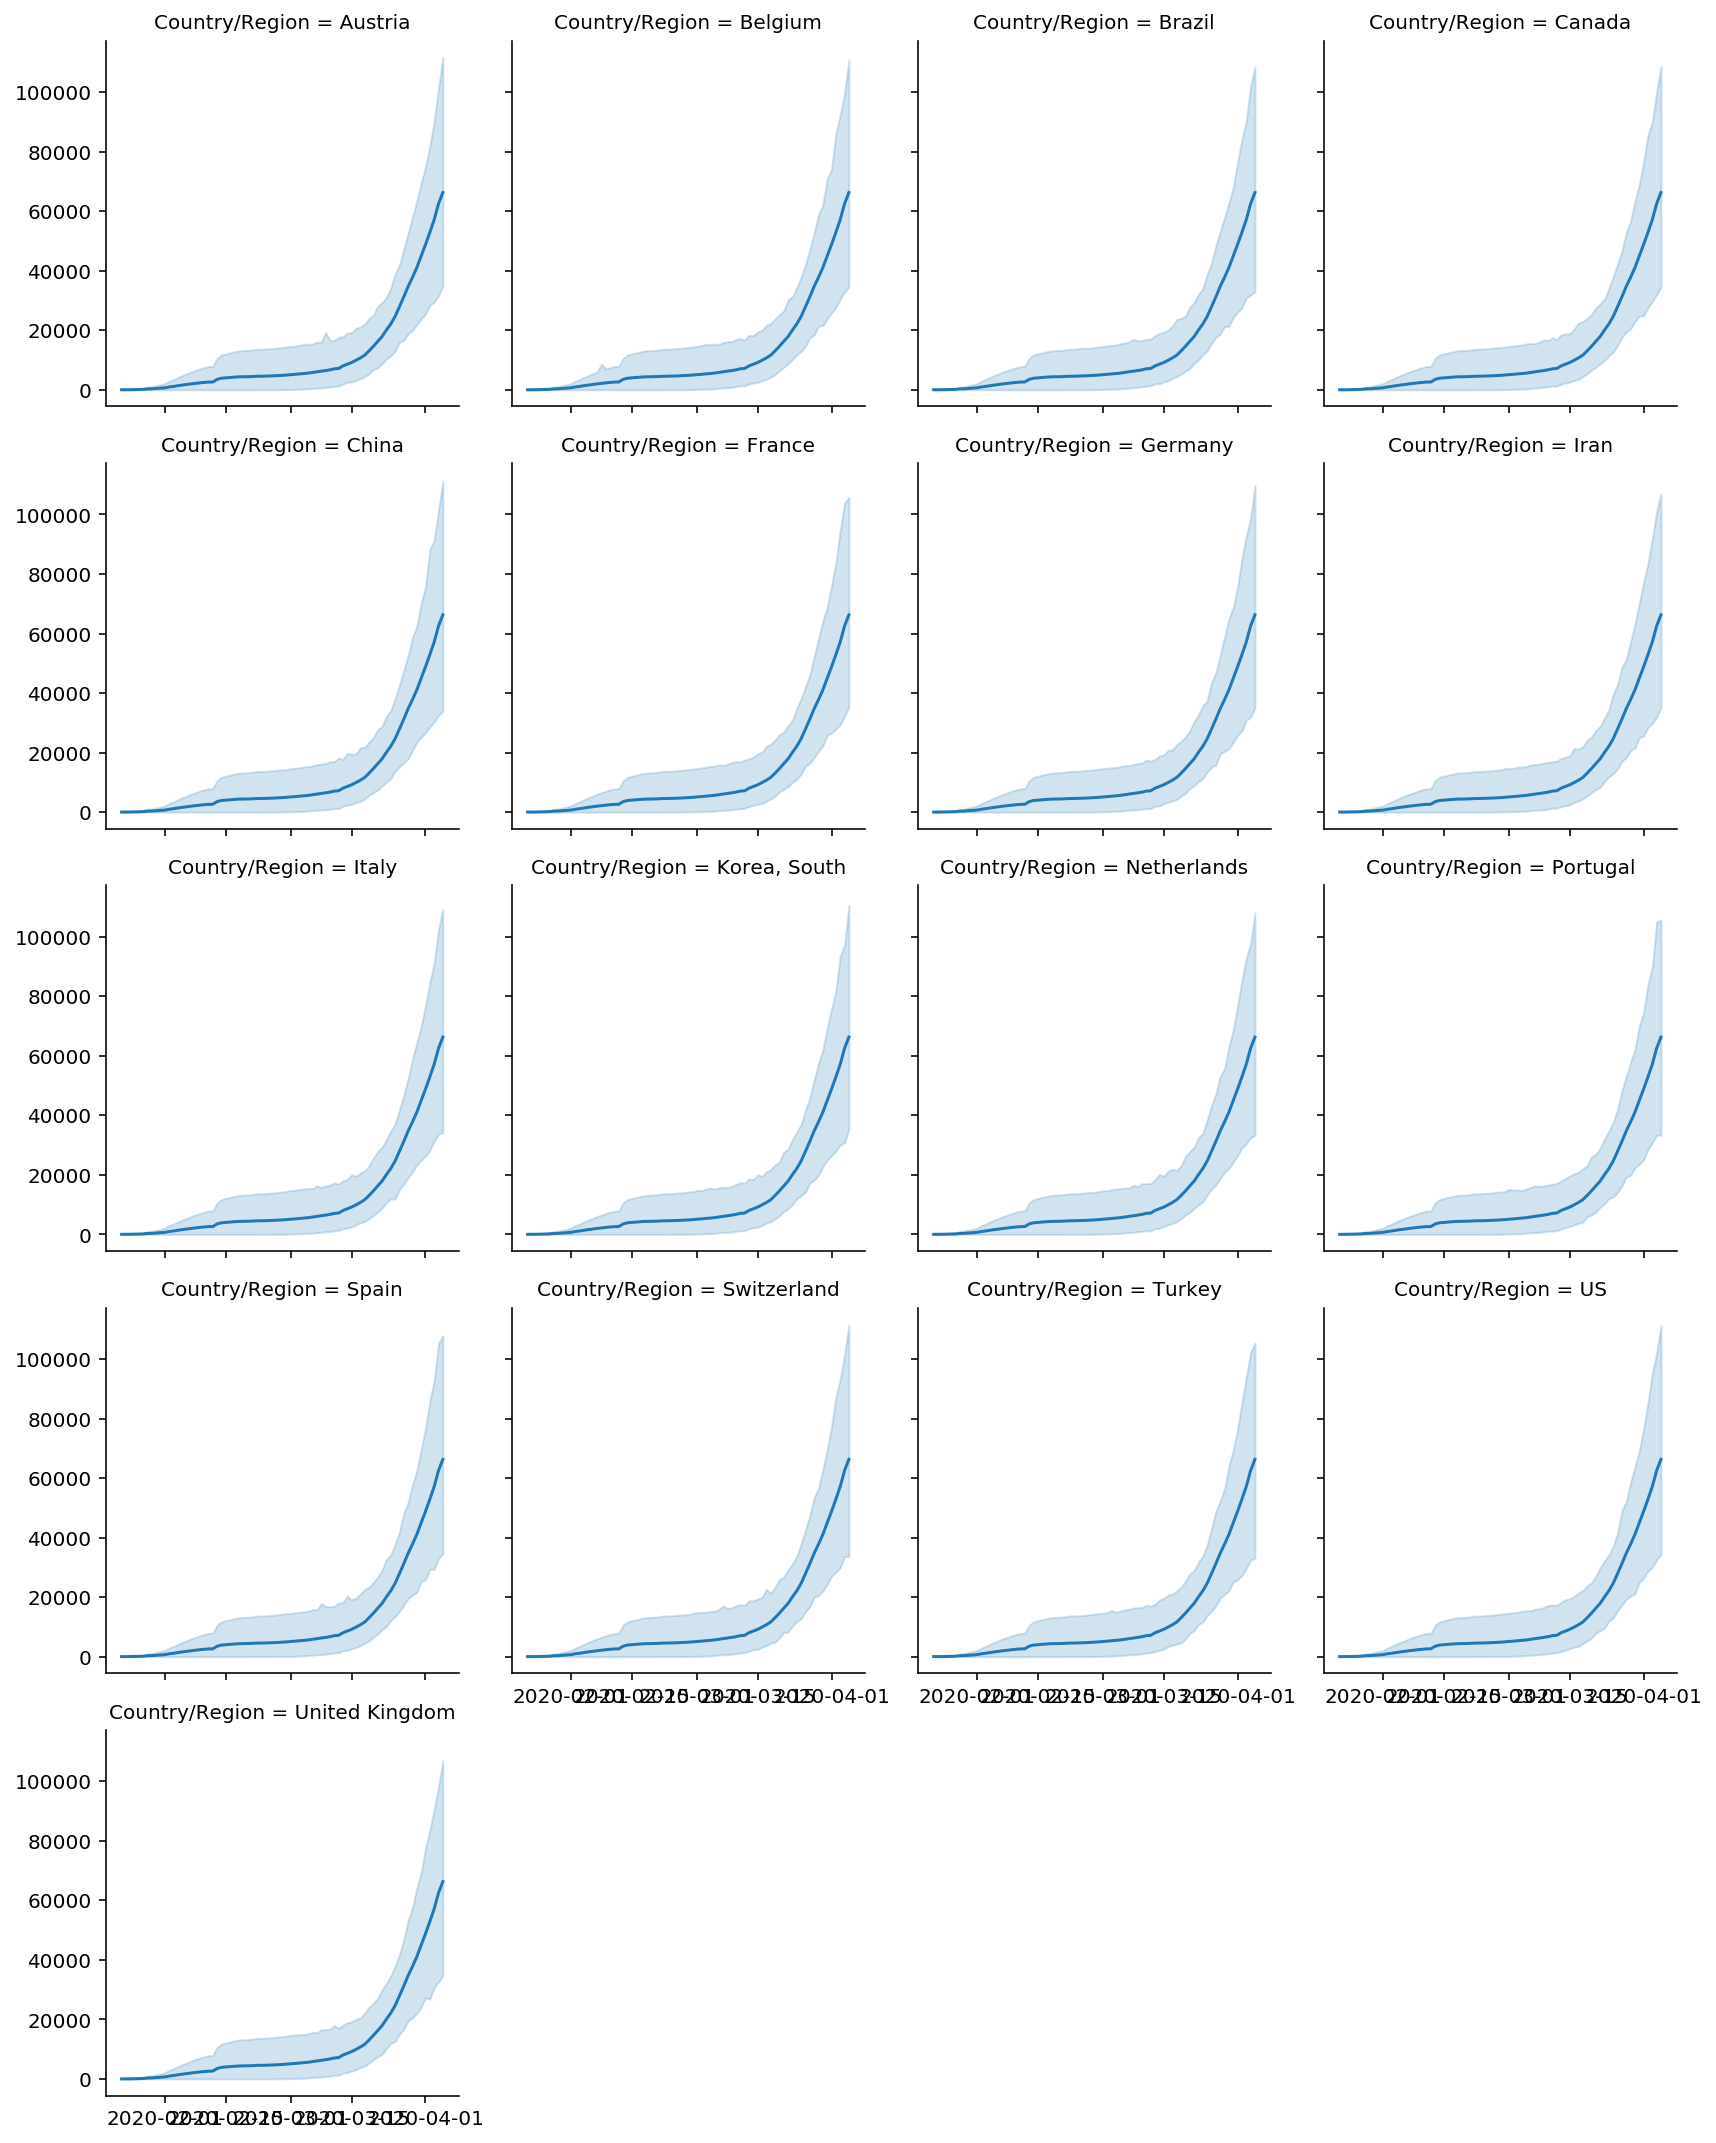

In [60]:
g=sns.FacetGrid(dg, col='Country/Region', col_wrap=4)
g.map(sns.lineplot, data=dg, x='Date', y='Confirmed')